In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt


def quadraticII(x, y, a, b, c, d, e, f, g, h, i, j):
     
    if (e*x + f*y + i)**2 - 4*c*(a*(x)**2 + b*(y)**2 + d*x*y + g*x + h*y + j) < 0.0:
        delta = 0
        print("delta < 0!")
        z1 =  (-(e*x + f*y + i)) / (2*c)
        z2 =  (-(e*x + f*y + i)) / (2*c)
                    
    else:
        delta = (e*x + f*y + i)**2 - 4*c*(a*(x)**2 + b*(y)**2 + d*x*y + g*x + h*y + j)
    
        z1 =  (-(e*x + f*y + i) + np.sqrt(delta)) / (2*c)
        z2 =  (-(e*x + f*y + i) - np.sqrt(delta)) / (2*c)
    return z1, z2


In [2]:
initialpars = (-0.00274866, -0.00274866, -7e-5, 1.4e-23, 4.8e-22, 1e-22, 5.6e-19, 1.8e-20, -0.00183404, -1e-6)
#initial pars vars = A      B           C       D        E         F      G        H        I            J
xvals = np.linspace(-20,450,51)/1000
yvals = np.linspace(-300,300,51)/1000

zarr1 = np.array([])
zarr2 = np.array([])

for x in xvals:
    for y in yvals:
        z1, z2 = quadraticII(x, y, *initialpars)
        zarr1 = np.append(zarr1, z1)
        zarr2 = np.append(zarr2, z2)


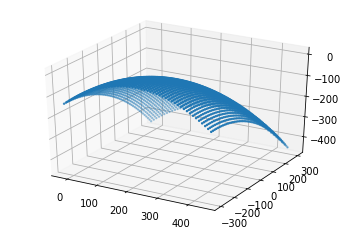

In [3]:
%matplotlib qt
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
X, Y = np.meshgrid(xvals, yvals)
fig = plt.figure(1)
ax = plt.axes(projection='3d')
ax.scatter(X*1000, Y*1000, zarr2*1000, cmap='viridis', linewidth=None, s=2);

Text(0.5, 0, 'z')

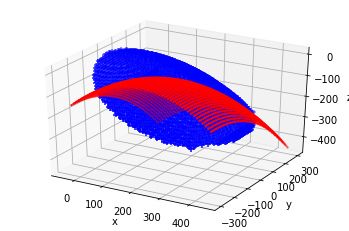

In [4]:
#plot 3d points from rim surface which is in m1rf
m1pts = np.loadtxt('temp.sfc', skiprows=2)

fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(m1pts[:,0], m1pts[:,1], m1pts[:,2], c='b', marker='+')
ax.scatter(X*1000, Y*1000, zarr2*1000, c='r', linewidth=None, s=2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [40]:
#now test z return function with real x y values from the measured data
xre = m1pts[:,0]/1000
yre = m1pts[:,1]/1000
xre = xre[1::10]
yre = yre[1::10]
print(xre.shape,yre.shape)
plt.plot(xre,yre,'g.')
plt.show()

# zre1 = np.array([])
# zre2 = np.array([])
# for x in xre:
#     for y in yre:
        
#         z1, z2 = quadraticII(x, y, *initialpars)
#         zre1 = np.append(zre1, z1)
#         zre2 = np.append(zre2, z2)
#         print(x,y, z1,z2)

#print(zre1.shape,zre2.shape)

(342,) (342,)


In [21]:
print(zre1.shape,zre2.shape)

(116964,) (116964,)


In [25]:
X, Y = np.meshgrid(xre, yre)
print(X.shape)
#print(X, Y)

(342, 342)


Text(0.5, 0, 'z')

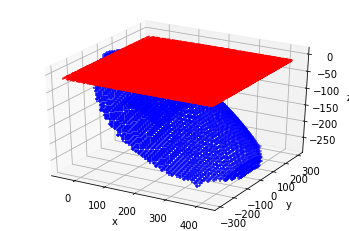

In [27]:
print(len(xre))

342


In [41]:
zre1 = np.array([])
zre2 = np.array([])

for i in range(len(xre)):
    #print(xre[i], yre[i])    
    z1, z2 = quadraticII(xre[i], yre[i], *initialpars)
    zre1 = np.append(zre1, z1)
    zre2 = np.append(zre2, z2)

Text(0.5, 0, 'z')

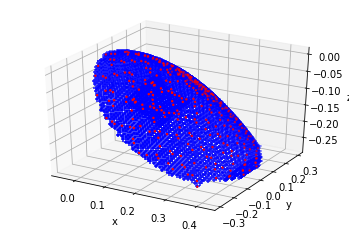

In [48]:
%matplotlib inline
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(m1pts[:,0]/1000, m1pts[:,1]/1000, m1pts[:,2]/1000, c='b', marker='+')
ax.scatter(xre, yre, zre2, c='r', linewidth=None, s=2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")